one-hot encoding

In [ ]:
from pandas.io.parsers.readers import read_csv
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # Needed for dimension reduction
from sklearn.datasets import load_wine # Dataset that I will be using
import matplotlib.pyplot as plt # Plotting 
import pandas as pd # Storing data convenieniently
df=read_csv(r'/datasetQnt.csv')
df.dropna(inplace=True)
df.describe()




,Unnamed: 0,order_id,product_id,category_id,price,user_id,qntProdotto
count,9137.000000,9.137000e+03,9.137000e+03,9.137000e+03,9137.000000,9.137000e+03,9137.000000
mean,4568.000000,2.325835e+18,1.636330e+18,2.276318e+18,190.211379,1.515916e+18,24.782204
std,2637.769038,1.698840e+16,2.775101e+17,2.822910e+16,330.594009,1.537696e+07,41.290090
min,0.000000,2.294444e+18,1.515966e+18,2.268105e+18,0.000000,1.515916e+18,1.000000
25%,2284.000000,2.310382e+18,1.515966e+18,2.268105e+18,20.810000,1.515916e+18,4.000000
50%,4568.000000,2.325351e+18,1.515966e+18,2.268105e+18,53.220000,1.515916e+18,10.000000
75%,6852.000000,2.343091e+18,1.515966e+18,2.268105e+18,226.830000,1.515916e+18,25.000000
max,9136.000000,2.348772e+18,2.344948e+18,2.374499e+18,6018.500000,1.515916e+18,210.000000


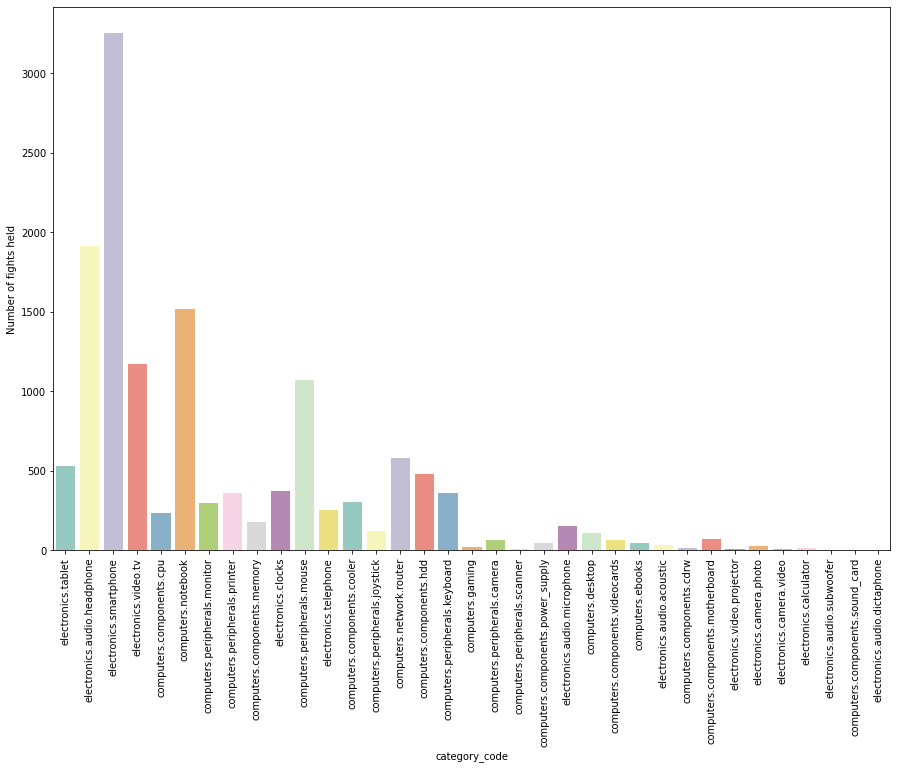

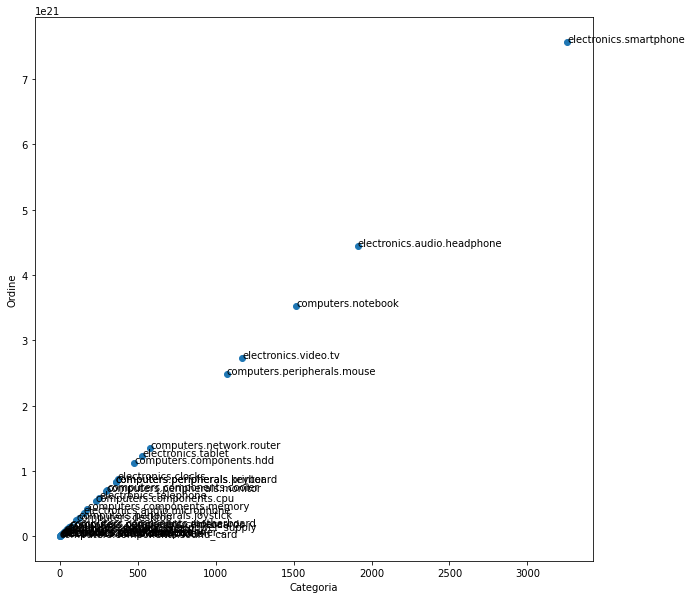

In [ ]:
from pandas.io.parsers.readers import read_csv
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
df = pd.read_csv("/datasetQntNs.csv")
df.head()
plt.figure(figsize = (15,10))
sns.countplot(x = "category_code", palette = "Set3",data = df)
plt.xticks(rotation = 90)
plt.ylabel("Number of fights held")
plt.show()


categoria = df["category_code"].value_counts()
categoria.sort_index(inplace=True)
ordine = df.groupby("category_code").sum()["order_id"]
ordine.sort_index(inplace=True)
from sklearn.preprocessing import scale
x = categoria.values
y = ordine.values
plt.figure(figsize = (10,10))
plt.scatter(x, y)
plt.xlabel("Categoria")
plt.ylabel("Ordine")
for i, txt in enumerate(categoria.index.values):
    a = plt.gca()
    plt.annotate(txt, (x[i], y[i]))
plt.show()




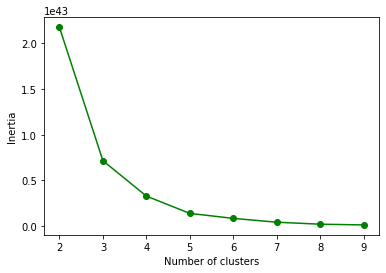

In [ ]:
from pandas.io.parsers.readers import read_csv
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
df = pd.read_csv("/datasetQntNs.csv")
df.head()


X = np.array(list(zip(x,y)))
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(2,10), inertias, "o-g")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

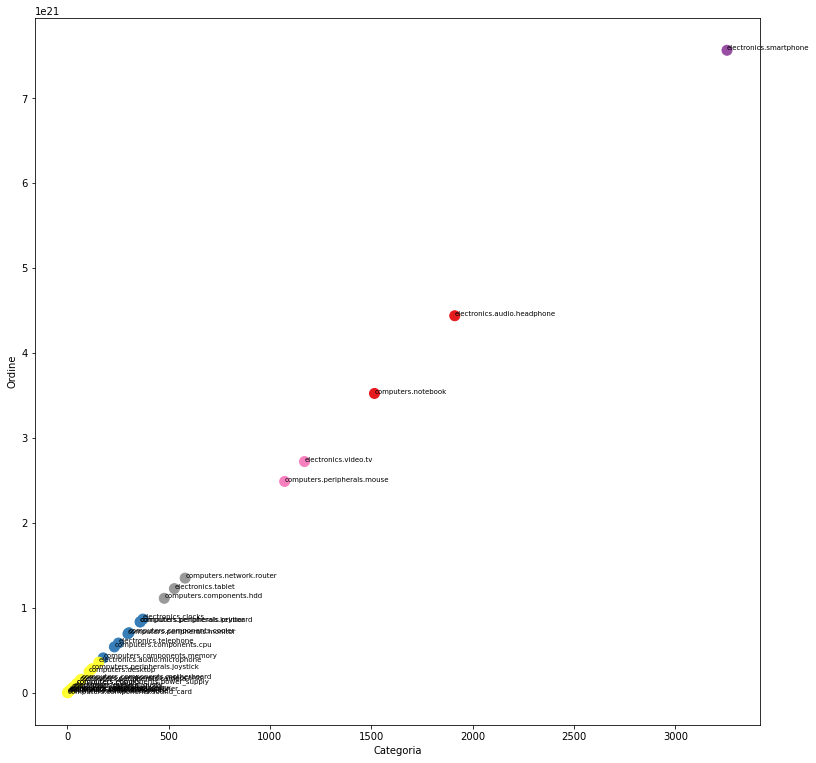

In [ ]:
from pandas.io.parsers.readers import read_csv
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
df = pd.read_csv("/datasetQntNs.csv")
df.head()

dc = pd.read_csv("/datasetCategorie.csv")
#K-MEANS 
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)
plt.figure(figsize = (13,13))
plt.xlabel("Categoria")
plt.ylabel("Ordine")
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=100, cmap='Set1')
for i, txt in enumerate(categoria.index.values):
    plt.annotate(txt, (X[i,0], X[i,1]), size = 7)
plt.show()



In [ ]:
dp = pd.read_csv("/datasetProdotti.csv")
dc = pd.read_csv("/datasetCategorie.csv")
#K-MEANS 
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
#il modello trova 6 centroidi, 6 cluster
cent = kmeans.cluster_centers_
print(cent)
print(kmeans.cluster_centers_.shape)

#vediamo adesso a quali cluster sono stati assegnate le nostre osservazioni (righe) del dataset:
print(kmeans.labels_)

#cancelliamo le colonne unnamed
dc= dc.filter(regex="^(?!Unnamed)", axis=1)

#aggiungiamo la colonna cluster
dc["cluster"]=kmeans.labels_
print(dc)

result =dp.merge(dc)
result= result.filter(regex="^(?!Unnamed)", axis=1)
result= result.filter(regex="^(?!qnt)", axis=1)
result= result.filter(regex="^(?!category_id)", axis=1)
print(result)


#result.to_csv('/result.csv')

[[4.35789474e+01 1.01474113e+20]
 [1.71400000e+03 3.98436588e+21]
 [3.25500000e+03 7.56725455e+21]
 [5.30000000e+02 1.23293587e+21]
 [1.12200000e+03 2.60816716e+21]
 [2.95500000e+02 6.87811272e+20]]
(6, 2)
[0 5 5 3 5 0 0 0 0 0 0 0 3 1 0 0 5 5 4 5 0 0 0 1 0 0 0 0 0 5 2 3 5 0 4]
                        category_code   qnt  cluster
0           computers.components.cdrw    14        0
1         computers.components.cooler   305        5
2            computers.components.cpu   233        5
3            computers.components.hdd   479        3
4         computers.components.memory   178        5
5    computers.components.motherboard    70        0
6   computers.components.power_supply    49        0
7     computers.components.sound_card     2        0
8     computers.components.videocards    65        0
9                   computers.desktop   108        0
10                   computers.ebooks    48        0
11                   computers.gaming    24        0
12           computers.network.ro

The average silhouette_score is :0.6076601720663735


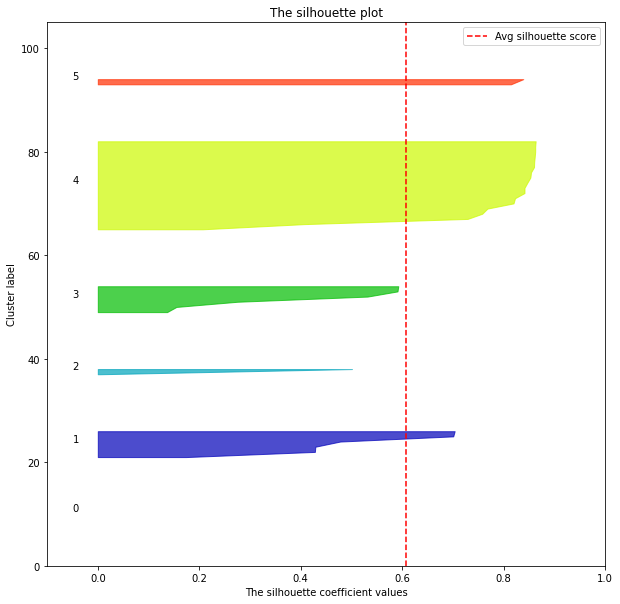

In [ ]:
from pandas.io.parsers.readers import read_csv
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
df = pd.read_csv("/datasetQntNs.csv")
df.head()

##SILHOUTTE SCORE- CALCOLO SU CATEGORIA
n_clusters = 6
plt.figure(figsize = (10,10))
plt.gca().set_xlim([-0.1,1])
plt.gca().set_ylim([0, len(X) + (n_clusters + 1) * 10])
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
labels = clusterer.fit_predict(X)
print("The average silhouette_score is :{}".format(silhouette_score(X, labels)))
sample_silhouette_values = silhouette_samples(X, labels)
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = \
    sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.gca().fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    plt.gca().text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.gca().axvline(x=silhouette_score(X, labels), color="red", linestyle="--", label = "Avg silhouette score")
plt.title("The silhouette plot")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
plt.legend()
plt.show()



# Nuova sezione